Load in data tables and format them into F Data Grids

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
root = os.getcwd()
dataroot = r'C:\Users\George\Documents\Python Scripts\FDA\Letters\Data'

In [4]:
#locate and read data files
os.chdir(dataroot)
xdata,ydata = pd.read_csv('xdata_abc.csv'),pd.read_csv('ydata_abc.csv')
xdata.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.806452,0.765161,0.734194,0.865806,0.708387,0.749677,0.744516,0.716129,0.705806,0.760000,...,0.685161,0.721290,0.569032,0.790968,0.651613,0.775484,0.762581,0.584516,0.736774,0.579355
1,0.806452,0.680000,0.685161,0.809032,0.674839,0.726452,0.710968,0.698065,0.625806,0.718710,...,0.587097,0.695484,0.507097,0.762581,0.633548,0.741935,0.734194,0.522581,0.705806,0.543226
2,0.765161,0.594839,0.602581,0.723871,0.630968,0.667097,0.659355,0.669677,0.561290,0.638710,...,0.509677,0.664516,0.421935,0.734194,0.584516,0.708387,0.705806,0.458065,0.643871,0.486452
3,0.680000,0.486452,0.538065,0.630968,0.576774,0.594839,0.600000,0.623226,0.499355,0.550968,...,0.440000,0.625806,0.378065,0.700645,0.548387,0.669677,0.672258,0.393548,0.576774,0.440000
4,0.615484,0.421935,0.486452,0.532903,0.543226,0.522581,0.532903,0.587097,0.432258,0.489032,...,0.378065,0.587097,0.310968,0.646452,0.509677,0.625806,0.628387,0.334194,0.527742,0.401290


To use FDataGrids, each column should be of equal length.
To acheive this the readdata class will be used to get the smoothed data each of equal vector legnth.

In [6]:
from Letters.readdata import letterData

In [7]:
letterdata = letterData('xdata_abc.csv','ydata_abc.csv')

In [9]:
#return to original directory
os.chdir(root)

In [21]:
#take all X data, and use Xsmooth with evenly sized vectors by using the SplEv tool
from scipy import interpolate
Bspline_coeff = letterdata.coefficients
X = pd.DataFrame(np.zeros(letterdata.x.shape),columns = letterdata.x.columns)
for i,col in enumerate(X.columns):
    X[col] = interpolate.splev(
        np.linspace(0,np.sum(~letterdata.x[col].isnull()) - 1,50),
        (Bspline_coeff['tx'].iloc[i],Bspline_coeff['cx'].iloc[i],Bspline_coeff['kx'].iloc[i]))

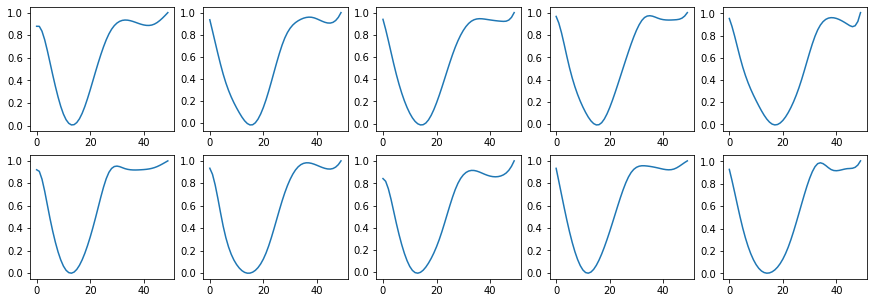

In [25]:
#check visuals are coherent for 'a0-9' values
fig,axes = plt.subplots(2,5,figsize = (15,5))
for i in range(10):
    axes[i//5,i%5].plot(np.arange(50),X['a{}'.format(i)])

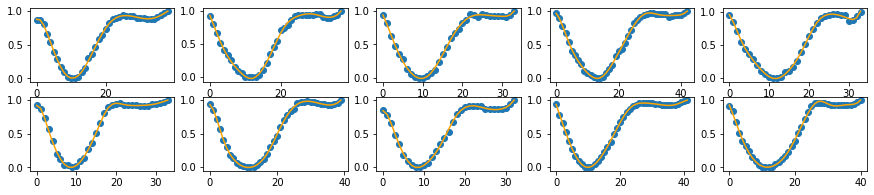

In [27]:
#compared to original values
letterdata.single_plotx()

Place in FDataGrid

In [39]:
from skfda.representation.grid import FDataGrid

X_data_matrix = [np.array(X[col]) for col in X.columns]
X_grid_points = [i for i in range(X.shape[0])]
X_FData = FDataGrid(X_data_matrix,X_grid_points,
                   dataset_name = 'Xletterdata_abc',
                   argument_names = ('time',),
                   coordinate_names = ('x_position',)
                   )
X_FData

FDataGrid(
    array([[[0.87828924],
            [0.87776323],
            [0.83459993],
            ...,
            [0.95064368],
            [0.97430251],
            [0.99926836]],
    
           [[0.93638992],
            [0.83541622],
            [0.73219906],
            ...,
            [0.92949889],
            [0.95816259],
            [1.001373  ]],
    
           [[0.93974368],
            [0.8495859 ],
            [0.7490728 ],
            ...,
            [0.93347287],
            [0.95745935],
            [1.00053653]],
    
           ...,
    
           [[0.68723162],
            [0.63230418],
            [0.56572324],
            ...,
            [0.95369139],
            [0.9756885 ],
            [0.99983375]],
    
           [[0.91331707],
            [0.86603812],
            [0.80273327],
            ...,
            [0.87625802],
            [0.93416169],
            [1.00231262]],
    
           [[0.70217886],
            [0.64968208],
            [0.584413

In [53]:
#Define categories for FDA
y = [c[0] for c in X.columns]
mapping = {'a':0,'b':1,'c':2}
categories = [*mapping]
y = np.array([mapping[l] for l in y])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
from sklearn.model_selection import train_test_split
from skfda.datasets import fetch_growth
from skfda.exploratory.depth import ModifiedBandDepth
from skfda.exploratory.stats.covariance import ParametricGaussianCovariance
from skfda.misc.covariances import Gaussian
from skfda.ml.classification import (
    KNeighborsClassifier,
    MaximumDepthClassifier,
    NearestCentroid,
    QuadraticDiscriminantAnalysis,
)

The number of a samples is 7
The number of b samples is 7
The number of c samples is 7


C:\Users\George\AppData\Local\Temp\ipykernel_2648\2945169423.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  X_train.plot(group = y_train, group_names = categories).show()


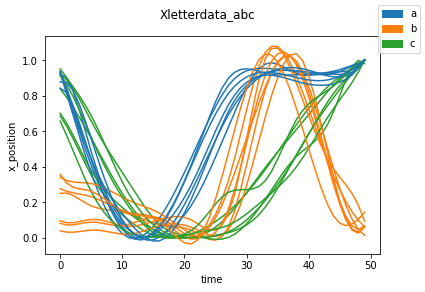

In [58]:
#split test train - ensure with random state equal split of categories
X_train,X_test,y_train,y_test = train_test_split(
    X_FData,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 7)

#Check for correct representation
print('The number of a samples is {}'.format(np.sum(y_train == 0)))
print('The number of b samples is {}'.format(np.sum(y_train == 1)))
print('The number of c samples is {}'.format(np.sum(y_train == 2)))

#Plot samples grouped by categories
X_train.plot(group = y_train, group_names = categories).show()

In [59]:
depth = MaximumDepthClassifier(depth_method=ModifiedBandDepth())
depth.fit(X_train, y_train)
depth_pred = depth.predict(X_test)
print(depth_pred)
print('The score of Maximum Depth Classifier is {0:2.2%}'.format(
    depth.score(X_test, y_test),
))

[2 2 1 2 0 1 0 2 2]
The score of Maximum Depth Classifier is 77.78%


In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn_pred)
print('The score of KNN is {0:2.2%}'.format(knn.score(X_test, y_test)))

[2 1 1 2 0 1 0 0 2]
The score of KNN is 100.00%


In [61]:
centroid = NearestCentroid()
centroid.fit(X_train, y_train)
centroid_pred = centroid.predict(X_test)
print(centroid_pred)
print('The score of Nearest Centroid Classifier is {0:2.2%}'.format(
    centroid.score(X_test, y_test),
))

[2 1 1 2 0 1 0 0 2]
The score of Nearest Centroid Classifier is 100.00%


In [63]:
#use relevant variance and legnth scale
qda = QuadraticDiscriminantAnalysis(
    ParametricGaussianCovariance(
        Gaussian(variance=0.2, length_scale=0.1),
    ),
    regularizer=0.05,
)
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
print(qda_pred)
print('The score of functional QDA is {0:2.2%}'.format(
    qda.score(X_test, y_test),
))

[2 1 1 2 0 1 0 0 2]
The score of functional QDA is 100.00%


In [64]:
accuracies = pd.DataFrame({
    'Classification methods':
        [
            'Maximum Depth Classifier',
            'K-Nearest-Neighbors',
            'Nearest Centroid Classifier',
            'Functional QDA',
        ],
    'Accuracy':
        [
            '{0:2.2%}'.format(
                depth.score(X_test, y_test),
            ),
            '{0:2.2%}'.format(
                knn.score(X_test, y_test),
            ),
            '{0:2.2%}'.format(
                centroid.score(X_test, y_test),
            ),
            '{0:2.2%}'.format(
                qda.score(X_test, y_test),
            ),
        ],
})

accuracies

,Classification methods,Accuracy
0,Maximum Depth Classifier,77.78%
1,K-Nearest-Neighbors,100.00%
2,Nearest Centroid Classifier,100.00%
3,Functional QDA,100.00%


The models perform particularly well, although this is a very easy application. Depth classifier does not work well...

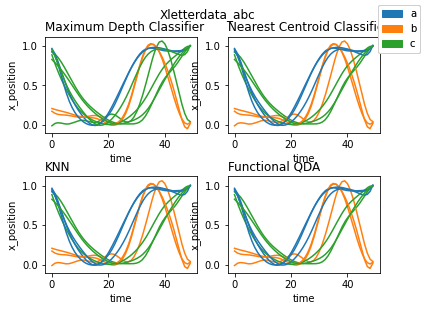

In [65]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.45, bottom=0.06)

X_test.plot(group=centroid_pred, group_names=categories, axes=axs[0][1])
axs[0][1].set_title('Nearest Centroid Classifier', loc='left')

X_test.plot(group=depth_pred, group_names=categories, axes=axs[0][0])
axs[0][0].set_title('Maximum Depth Classifier', loc='left')

X_test.plot(group=knn_pred, group_names=categories, axes=axs[1][0])
axs[1][0].set_title('KNN', loc='left')

X_test.plot(group=qda_pred, group_names=categories, axes=axs[1][1])
axs[1][1].set_title('Functional QDA', loc='left')

plt.show()